# Unit 5 - Financial Planning

In [113]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [114]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [115]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [116]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [117]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value= my_btc * btc_price
my_eth_value= my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43837.71
The current value of your 5.3 ETH is $12480.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [118]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [119]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [120]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stocks = api.get_bars(
    tickers,
    timeframe,
    start=today
).df

df_stocks


# Reorganize the DataFrame
# Separate ticker data
agg_df = df_stocks[df_stocks['symbol'] == 'AGG'].drop('symbol', axis=1) # Dataframe created for 'AGG' from 'data_5years_df' without the column 'symbol'
spy_df = df_stocks[df_stocks['symbol'] == 'SPY'].drop('symbol', axis=1) # Dataframe created for 'SPY' from 'data_5years_df' without the column 'symbol'

# Concatenate the ticker DataFrames
df_stocks_portfolio = pd.concat([agg_df,spy_df], axis = 1, keys=['AGG', 'SPY'])


# Preview DataFrame
df_stocks_portfolio.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956

In [121]:
# Pick AGG and SPY close prices
agg_close_price = df_stocks_portfolio['AGG']['close'][-1]  # To acquire the last closing price of 'AGG'
spy_close_price = df_stocks_portfolio['SPY']['close'][-1]  # To acquire the last closing price of 'SPY'


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [122]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price # Current value = number of shares held  * price of each share
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [123]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value # total value of assets in crypto 
shares = my_spy_value + my_agg_value # total value of assets in shares 

# Create savings DataFrame
data_dict = {'amount': [crypto, shares]}
factors = ['crypto', 'shares']
dt_savings = pd.DataFrame(data_dict, index = factors) # creating data frame with 'crypto' and 'shares' as index to corresponding values


# Display savings DataFrame
dt_savings

,amount
crypto,56318.562872
shares,41601.000000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

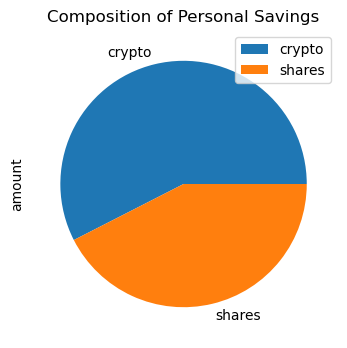

In [124]:
# Plot savings pie chart
dt_savings.plot.pie(y='amount', title='Composition of Personal Savings', figsize=(4,4))

In [125]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total = crypto + shares

# Validate saving health
if savings_total > emergency_fund :
    print("Congratulations! You have enough money in your emergency fund.")
elif savings_total == emergency_fund :
    print("Congratulations! You have reached your goal set for emergency fund.")
else :
    print(f"You are ${emergency_fund - savings_total} away from your goal set for the emergency fund." )

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [126]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat() # Dates chosen set apart by 5 years

In [127]:
# Get 5 years' worth of historical data for SPY and AGG
data_5years_df = api.get_bars(
    tickers,
    timeframe='1Day',
    start=start_date,
    end=end_date
).df



# Reorganize the DataFrame
# Separate ticker data
agg_df = data_5years_df[data_5years_df['symbol'] == 'AGG'].drop('symbol', axis=1) # Dataframe created for 'AGG' from 'data_5years_df' without the column 'symbol'
spy_df = data_5years_df[data_5years_df['symbol'] == 'SPY'].drop('symbol', axis=1) # Dataframe created for 'SPY' from 'data_5years_df' without the column 'symbol'


# Concatenate the ticker DataFrames
df_stock_data= pd.concat([agg_df, spy_df], axis=1, keys= ['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-06-18 04:00:00+00:00       10590  105.864382  275.49  276.700  274.95   
2018-06-19 04:00:00+00:00       10342  106.041881  274.00  275.750  273.53   
2018-06-20 04:00:00+00:00        9220  105.886127  276.26  276.720  275.59   
2018-06-21 04:00:00+00:00       11286  105.870603  275.96  275.980  273.68   
2018-06-22 04:00:00+00:00        7830  105.897826  275.66  275.785  274.49   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-06-18 04:00:00+00:00  276.59  53163695      221103  276.151288  
2018-06-19 04:00:00+00:00  275.48  97669710      337433  274.931757  
2018-06-20 04:00:00+00:00  276.01  54051558      212283  276.065730  
2018-06-21 04:00:00+00:00  274.24  75659252      289344  274.618337  
2018-06-22 04:00:00+00:00  274.76  58532014      231536  275.099940

In [128]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30year = MCSimulation( # Class incorporated
    portfolio_data = df_stock_data,
    weights = [.40,.60], # wieghts arranged in respective orders in the dataframe - 40% AGG and 60% SPY
    num_simulation = 500, # number of simulations set to 500
    num_trading_days = 252*30 # number of trading days set to 30 years
)

In [133]:
# Printing the simulation input data

mc_30year.portfolio_data.head() 


AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-18 04:00:00+00:00       10590  105.864382          NaN  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603     0.000331  275.96   
2018-06-22 04:00:00+00:00        7830  105.897826     0.000945  275.66   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-06-18 04:00:00+00:00  276.700  274.95  276.59  53163695      221103   
2018-06-19 04:00:00+00:00  275.750  273.53  275.48  97669710      337433   
2018-06-20 04:00:00+00:00  276.720  275.59  276.01  54051558      212283   
2018-06-21 04:00:00+00:00  275.980  273.68  274.24  75659252      289344   
2018-06-22 04:00:00+00:00  275.785  274.49  274.76  58532014      231536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  276.151288          NaN  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924  
2018-06-21 04:00:00+00:00  274.618337    -0.006413  
2018-06-22 04:00:00+00:00  275.099940     0.001896

In [136]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

mc_30year.calc_cumulative_return() # function from class

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 110.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 120.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 130.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 140.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 150.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 160.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 170.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 180.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 190.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 210.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 220.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 230.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 240.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 250.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 260.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 270.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 280.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 290.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 310.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 320.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 330.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 340.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 350.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 360.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 370.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 380.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 390.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 410.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 420.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 430.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 440.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 450.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 460.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 470.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 480.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 490.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005014,0.981847,1.012590,1.002707,0.993747,0.983499,1.006233,0.997220,0.989003,1.001740,...,1.016663,1.005467,0.990711,1.010440,0.995760,0.996419,1.008059,0.990718,0.992597,0.998785
2,1.004681,0.973995,1.028352,1.010997,1.001604,0.979584,1.006794,0.985745,0.984558,0.990166,...,1.014126,1.008125,0.980319,1.001594,0.993923,1.001394,1.009879,0.995759,0.987712,0.991871
3,1.008263,0.966082,1.039128,1.024664,1.006121,0.989828,1.004806,0.972000,0.985605,0.996859,...,1.022965,1.025458,0.985033,1.000589,0.993135,1.009933,1.013753,0.991371,0.977189,0.991006
4,1.027924,0.973736,1.033244,1.050725,0.997082,0.985313,1.019176,0.966036,0.994016,0.996859,...,1.031312,1.020493,0.983364,1.009684,0.988824,1.015718,1.019928,0.971413,0.980137,0.982945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.349171,3.539650,1.942422,3.111975,1.505609,7.499400,1.289848,2.225174,2.582227,18.775567,...,3.204439,6.595471,5.726893,6.555403,2.343540,16.614540,4.044791,7.174356,0.913404,3.484424
7557,4.367589,3.528720,1.963100,3.125474,1.515608,7.534009,1.289164,2.224615,2.565810,18.570337,...,3.237026,6.528142,5.744873,6.588619,2.327190,16.632302,4.041712,7.117666,0.911313,3.467508
7558,4.351259,3.564558,1.959244,3.117535,1.522016,7.529082,1.286215,2.236614,2.602380,18.603957,...,3.221255,6.489871,5.725782,6.680069,2.326564,16.695536,4.012897,7.090519,0.907205,3.448527
7559,4.348754,3.582315,1.977234,3.139462,1.527031,7.515721,1.276552,2.229712,2.625881,18.389200,...,3.198927,6.449525,5.637992,6.610645,2.285310,16.914798,4.024620,7.127325,0.901809,3.441677


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

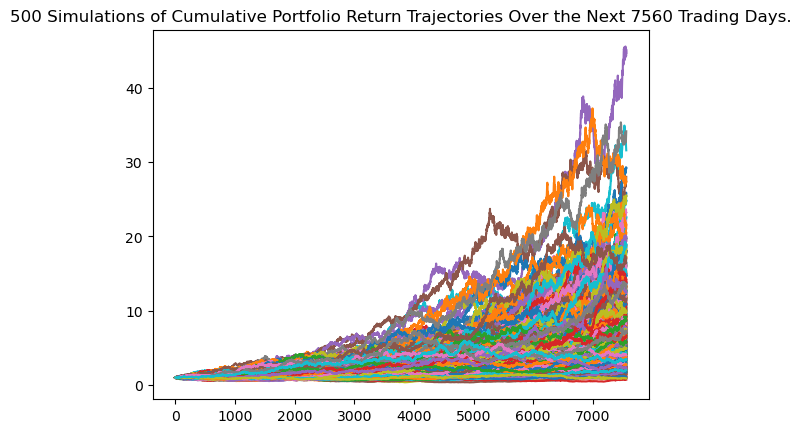

In [137]:
# Plot simulation outcomes

mc_30year.plot_simulation() # function from the Class

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

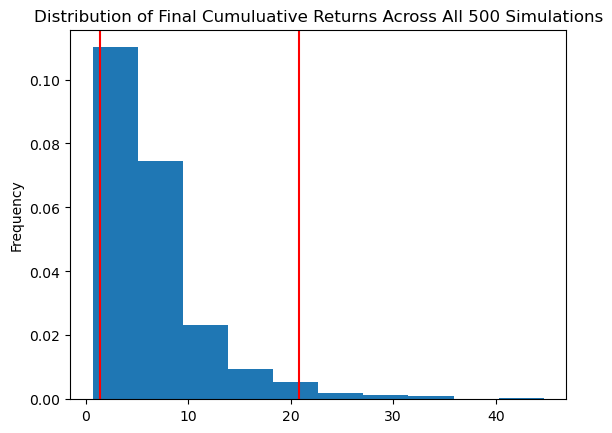

In [138]:
# Plot probability distribution and confidence intervals

mc_30year.plot_distribution() # function from the Class

### Retirement Analysis

In [139]:
# Fetch summary statistics from the Monte Carlo simulation results

simulation_summary = mc_30year.summarize_cumulative_return() # function from the Class

# Print summary statistics
print(simulation_summary)

count           500.000000
mean              6.719871
std               5.377303
min               0.712458
25%               3.161154
50%               5.363226
75%               8.382071
max              44.676109
95% CI Lower      1.380009
95% CI Upper     20.789215
Name: 7560, dtype: float64


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [140]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(simulation_summary[8] * initial_investment, 2)
ci_upper = round(simulation_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $27600.18 and $415784.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [141]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(simulation_summary[8] * initial_investment, 2)
ci_upper = round(simulation_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $41400.27 and $623676.44


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [142]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5years = MCSimulation( # Class incorporated 
    portfolio_data = df_stock_data,
    weights = [.40,.60], # wieghts arranged in respective orders in the dataframe - 40% AGG and 60% SPY
    num_simulation = 500, # number of simulations set to 500
    num_trading_days = 252*5 # number of trading days set to 5 years
)

In [143]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

mc_5years.calc_cumulative_return() # function from class

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 110.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 120.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 130.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 140.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 150.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 160.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 170.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 180.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 190.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 220.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 230.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 240.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 270.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 280.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 290.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 310.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 320.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 330.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 340.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 350.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 360.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 370.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 380.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 390.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 410.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 420.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 430.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 440.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 450.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 460.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 470.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 480.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 490.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987333,1.006047,1.004604,1.003457,1.008532,1.011302,0.994251,1.004716,1.008627,0.994943,...,0.992911,0.999376,1.002696,0.991266,0.997899,1.000998,1.007100,1.001997,1.008399,1.002484
2,0.984618,0.999430,1.017803,1.016870,1.014813,1.005134,0.993423,0.991297,1.009613,0.983517,...,0.991846,1.013159,1.000066,0.981361,0.993773,0.989278,0.999366,1.006014,1.018845,0.999261
3,0.987826,1.000027,1.020156,1.020306,1.019469,0.995528,0.995622,0.986413,1.000608,0.971589,...,0.994635,1.027302,0.986033,0.974651,1.001332,0.989008,0.991755,1.012488,1.021917,1.001489
4,0.980157,1.019983,1.019401,1.010513,1.021108,0.999472,0.994739,0.985005,1.002095,0.981299,...,0.992597,1.036619,0.981665,0.979528,1.020808,1.000270,0.993765,1.007620,1.022846,0.999958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.905662,1.500752,1.021649,1.412952,1.602691,0.809237,1.670773,1.247623,1.954777,1.950577,...,1.196796,1.287419,0.920374,1.754740,3.324114,1.471478,1.510548,1.616370,1.040578,1.228026
1257,0.899525,1.498135,1.032266,1.416196,1.581917,0.819549,1.671974,1.260334,1.968907,1.939979,...,1.197186,1.284630,0.921834,1.729807,3.322645,1.436538,1.510295,1.614128,1.036761,1.246289
1258,0.896636,1.496752,1.018068,1.433078,1.593466,0.830094,1.672858,1.237873,1.999454,1.927840,...,1.189372,1.286507,0.919315,1.715602,3.247594,1.436510,1.504538,1.637507,1.046613,1.246943
1259,0.895810,1.515376,1.016671,1.430441,1.594212,0.831870,1.683463,1.238193,1.988081,1.926946,...,1.201982,1.288056,0.926392,1.725876,3.259540,1.424796,1.503578,1.620325,1.056418,1.231137


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

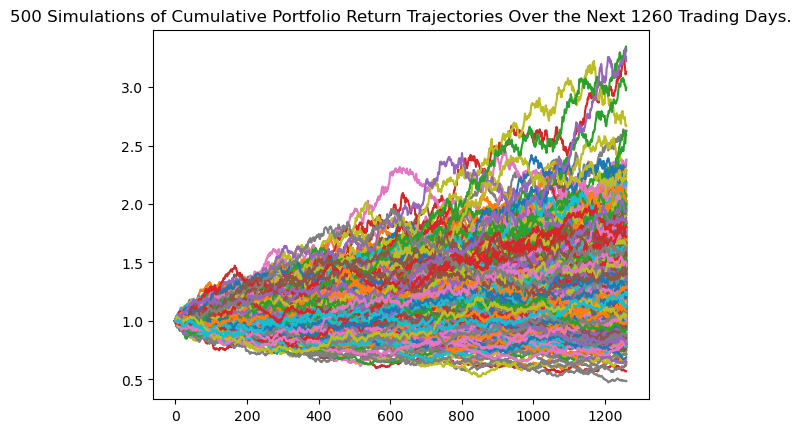

In [144]:
# Plot simulation outcomes
mc_5years.plot_simulation() # function from class

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

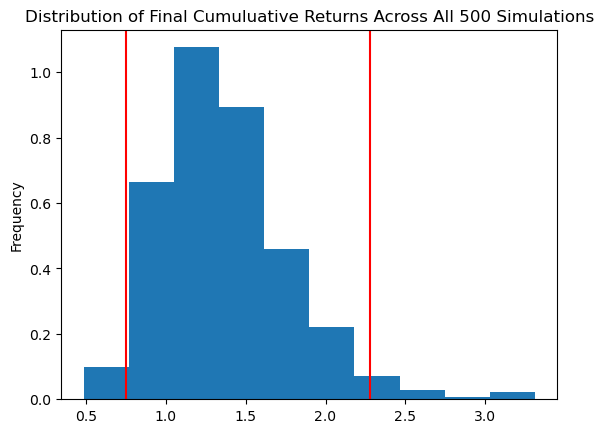

In [145]:
# Plot probability distribution and confidence intervals
mc_5years.plot_distribution()  # function from class

In [146]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_5years = mc_5years.summarize_cumulative_return()  # function from class

# Print summary statistics
print(simulation_5years)

count           500.000000
mean              1.366261
std               0.409567
min               0.485780
25%               1.081443
50%               1.322028
75%               1.596676
max               3.311676
95% CI Lower      0.751637
95% CI Upper      2.277742
Name: 1260, dtype: float64


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [147]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(simulation_5years[8] * initial_investment, 2)
ci_upper_five = round(simulation_5years[9] * initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $45098.21 and $136664.5


### Ten Years Retirement Option

In [148]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10years = MCSimulation( # Class incorporated
    portfolio_data = df_stock_data,
    weights = [.40,.60], # wieghts arranged in respective orders in the dataframe - 40% AGG and 60% SPY
    num_simulation = 500, # number of simulations set to 500
    num_trading_days = 252*10 # number of trading days set for 10 years  
)

In [149]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10years.calc_cumulative_return()  # function from class

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 110.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 120.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 130.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 140.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 150.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 160.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 170.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 180.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 190.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 210.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 220.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 230.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 240.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 250.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 260.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 270.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 280.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 290.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 310.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 320.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 330.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 340.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 350.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 360.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 370.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 380.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 390.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 410.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 420.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 430.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 440.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 450.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 460.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 470.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 480.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 490.


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999291,1.008529,1.003567,0.995765,1.016128,1.006533,1.004791,0.995512,0.994613,0.998150,...,0.998763,0.993824,0.990871,0.999225,0.997769,0.989532,1.001485,1.006061,0.994119,1.006542
2,1.010688,1.006179,0.996632,1.011149,1.015088,1.001821,1.006321,0.981597,0.987058,1.010392,...,1.014479,0.994459,1.002022,1.000670,0.997231,0.983612,1.006038,1.004780,0.982624,1.008471
3,1.007244,0.989982,1.008973,1.007755,1.013555,1.003353,0.994059,0.991753,0.984352,1.004236,...,1.034370,0.987796,0.992444,0.994684,1.008696,0.984945,0.997787,1.015704,0.973242,0.996615
4,1.001136,0.995513,1.001181,0.999019,1.011480,0.992050,0.990035,0.977143,0.983200,1.011299,...,1.024684,0.990685,1.004608,1.005032,0.998684,0.990586,1.001934,1.018994,0.972718,0.999838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.643607,1.602807,2.184623,2.199616,3.341527,1.698436,3.068713,1.573734,0.745978,1.781564,...,1.826579,0.633415,1.955563,1.214098,1.505428,1.316575,1.298681,1.688598,1.998048,2.486868
2517,1.643240,1.599281,2.183283,2.226646,3.369950,1.683461,3.064716,1.603724,0.747347,1.795494,...,1.832424,0.634157,1.953255,1.220145,1.495496,1.305537,1.291035,1.685268,1.993489,2.479797
2518,1.640285,1.597164,2.225673,2.231186,3.391554,1.666173,3.038753,1.594800,0.744350,1.791520,...,1.843267,0.636553,1.951885,1.231808,1.500719,1.321022,1.304639,1.679140,2.016543,2.477816
2519,1.619325,1.607971,2.234840,2.191253,3.381086,1.677156,3.007634,1.601770,0.754094,1.800503,...,1.862935,0.637787,1.953061,1.228928,1.495618,1.317840,1.300730,1.653868,2.012295,2.442113


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

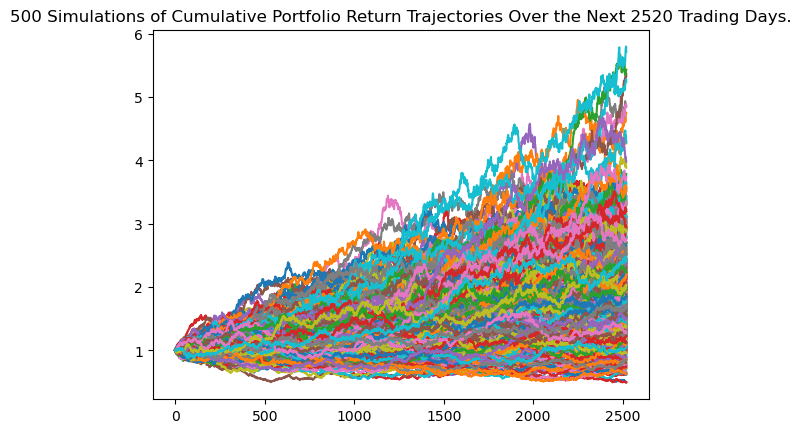

In [150]:
# Plot simulation outcomes
mc_10years.plot_simulation()  # function from class

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

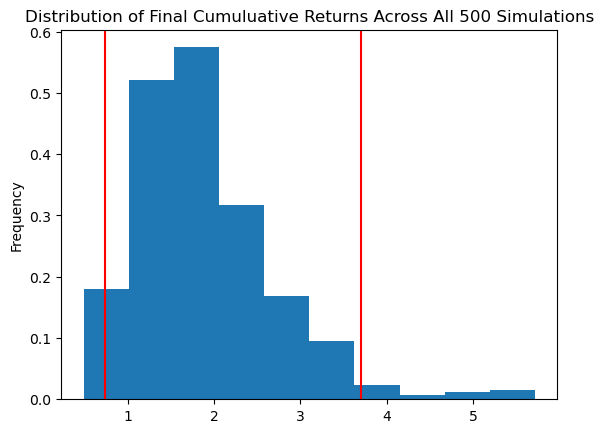

In [151]:
# Plot probability distribution and confidence intervals
mc_10years.plot_distribution()  # function from class

In [152]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_10years = mc_10years.summarize_cumulative_return()

# Print summary statistics
print(simulation_10years)  # function from class

count           500.000000
mean              1.894090
std               0.816695
min               0.492382
25%               1.318430
50%               1.762618
75%               2.300784
max               5.716080
95% CI Lower      0.738140
95% CI Upper      3.703789
Name: 2520, dtype: float64


C:\Users\vishn\Documents\Python\Assignment-5\Starter_Code\Assignment-05\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [153]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(simulation_10years[8] * initial_investment, 2)
ci_upper_ten = round(simulation_10years[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $44288.39 and $222227.36
